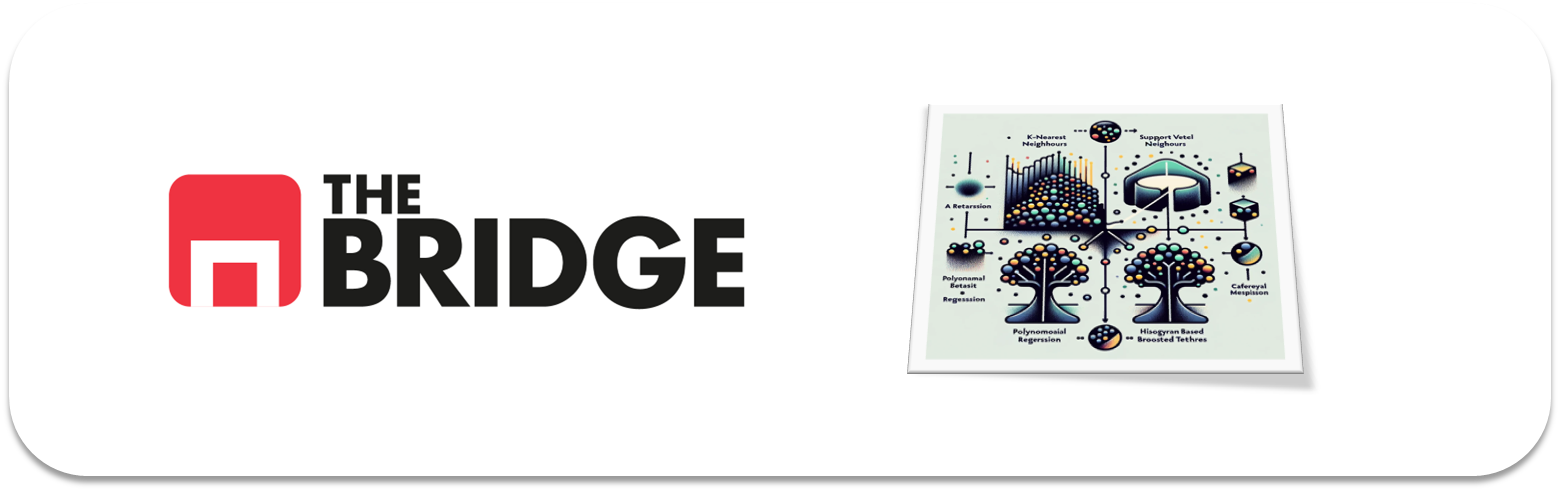

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import bootcampviztools as bt # no consigo que me lo coja

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [4]:
df = pd.read_csv('/Users/lauragarcia/Projects/ONLINE_DS_THEBRIDGE_Curso2025/Bootcamp_Data_Science_2025/04_Machine_Learning /Sprint 12_ML_Modelos_Supervisdos_III_Otros_Modelos_Supervisados_y_Repaso/Unidad 01/data/credit_npo.csv')

In [5]:
df.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6049,0,0.188926,50,0,0.175930,2500.0,5,0,0,0,3.0
4031,0,0.099298,64,0,0.512849,10739.0,19,0,4,0,0.0
11148,1,0.765809,35,0,0.336025,2600.0,3,3,0,1,2.0
38,0,0.014361,62,0,0.428295,3102.0,7,0,1,0,0.0
7996,0,0.816453,35,0,0.432448,3500.0,5,0,1,0,2.0
3130,0,0.975395,41,0,0.445765,5300.0,5,0,1,0,2.0
3885,0,0.085477,47,0,0.182957,6066.0,5,0,2,0,1.0
705,0,0.393298,57,1,0.502634,14616.0,18,0,4,1,1.0
4820,0,0.024952,64,0,0.353174,4300.0,9,0,1,0,0.0
1359,0,0.011262,67,0,22.000000,NaN,7,0,0,0,0.0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [7]:
df['SeriousDlqin2yrs'].nunique()

2

|Nombre | Descripcion | Tipo de variable| Notas |
|----------|----------|----------|--------------|
| SeriousDlqin2yrs  | Mas de 990 días de morosida en 2 años   | | Parece una variable binaria |
| RevolvingUtilizationOfUnsecuredLines| relación entre la cantidad total de dinero adeudado y el límite de crédito total  |   |  |
| Age | Edad del ususario |   |   |
| NumberOfTime30-59DaysPastDueNotworse | numero de veces de retraso en el pago 30-59 días | |  |
| DebtRatio | Pagos de deudas |   | Puede que sea un porcentaje |
| MonthlyIncome |   Ingresos mensuales |  |  |
| NumberOf OpenCreditLInesandLoans | Número de creditos y perestamos abiertos |   |   |
| NumberOfTimes90daysLate | Veces que paga tarde en 90 days |   |   |
| NumberRealEstateLoansOrLines |Número real de prestamos o bienes |   |  |
| NumberOfTime60-89DaysPastDueNotWorse | Numero de veces que se ha retraso en el pago 60-90 dias |  |   |
| NumberOfDependents |  Personas dependientes (familiares a su cargo) |   |   |

In [8]:
# Voy a realizar una tipificación de las variables
# Creamos una dataframe para tipificar cada columna y ver qué variables son categóricas, binarias, numéricas contínuas o discretas
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
# Ahora ya si las clasificamos en función de los resultados de las operaciones realizadas en el apartado anterior
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
print(df_tipificacion) 

                                       Card     %_Card     Tipo  \
SeriousDlqin2yrs                          2   0.015953    int64   
RevolvingUtilizationOfUnsecuredLines  10764  85.857861  float64   
age                                      78   0.622158    int64   
NumberOfTime30-59DaysPastDueNotWorse     10   0.079764    int64   
DebtRatio                             11547  92.103374  float64   
MonthlyIncome                          4167  33.237617  float64   
NumberOfOpenCreditLinesAndLoans          43   0.342985    int64   
NumberOfTimes90DaysLate                  13   0.103693    int64   
NumberRealEstateLoansOrLines             16   0.127622    int64   
NumberOfTime60-89DaysPastDueNotWorse      8   0.063811    int64   
NumberOfDependents                       10   0.079764  float64   

                                       Clasificada_como  
SeriousDlqin2yrs                                Binaria  
RevolvingUtilizationOfUnsecuredLines  Numerica Continua  
age                  

|Nombre | Descripcion | Tipo de variable| Notas |
|----------|----------|----------|--------------|
| SeriousDlqin2yrs  | Mas de 90 dias de morosidad en 2 años   | Binaria| Parece una variable binaria |
| RevolvingUtilizationOfUnsecuredLines| relación entre la cantidad total de dinero adeudado y el límite de crédito total  | Numerica Continua  |  |
| Age | Edad del ususario | Numérca discreta  |   |
| NumberOfTime30-59DaysPastDueNotworse | numero de veces de retraso en el pago 30-59 días | Categorica|  |
| DebtRatio | Pagos de deudas | Numerica continua  | Puede que sea un porcentaje |
| MonthlyIncome |   Ingresos mensuales | Numerica continua |  |
| NumberOf OpenCreditLInesandLoans | Número de creditos y perestamos abiertos | Numerica discreta  |   |
| NumberOfTimes90daysLate | Veces que paga tarde en 90 days |  Numerica discreta |   |
| NumberRealEstateLoansOrLines |Número real de prestamos o bienes |  Numerica discreta |  |
| NumberOfTime60-89DaysPastDueNotWorse | Numero de veces que se ha retraso en el pago 60-90 dias | Caegorica |   |
| NumberOfDependents |  Personas dependientes (familiares a su cargo) | Categorica  |   |

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Se trata de un problema de clasificación y nuestra variablle target es SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

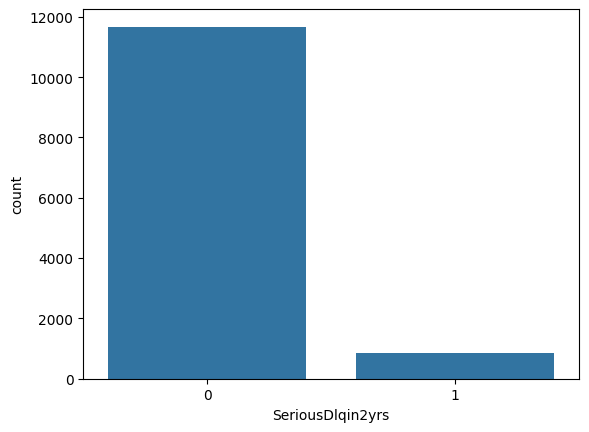

In [9]:
sns.countplot(x ='SeriousDlqin2yrs', data = df)

In [10]:
# está tremendamente desbalanceada la proporción de yes/no
target = 'SeriousDlq2yrs'

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [11]:
# Voy a escoger los modelos de regresion logística, arbol de clasificación y KNN
# Empiezo con la regresión logística
# Lo primero es dividir el dataset y luego realizar el MIni EDa

from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(df, test_size = 0.20, random_state=42) 

In [12]:
# Deberiamos imputar los missing, en MonthlyIncome poner la mediana, y en Numberofdependents usaremos la moda porque no podemos meterle un decimal , no tiene sentido
mediana = train_set['MonthlyIncome'].quantile(0.5) 
mediana

np.float64(5415.5)

In [13]:
moda = train_set['NumberOfDependents'].mode()
moda

0    0.0
Name: NumberOfDependents, dtype: float64

In [14]:
train_set['NumberOfDependents']= train_set['NumberOfDependents'].fillna(0)
test_set['NumberOfDependents'] = test_set['NumberOfDependents'].fillna(0)

In [15]:
train_set['MonthlyIncome']= train_set['MonthlyIncome'].fillna(mediana)
test_set['MonthlyIncome'] = test_set['MonthlyIncome'].fillna(mediana)

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 2   age                                   10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 4   DebtRatio                             10029 non-null  float64
 5   MonthlyIncome                         10029 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 7   NumberOfTimes90DaysLate               10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 10  NumberOfDependents                    10029 non-null  float64
dtypes: float64(4), int

In [17]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 9525 to 7995
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      2508 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  2508 non-null   float64
 2   age                                   2508 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  2508 non-null   int64  
 4   DebtRatio                             2508 non-null   float64
 5   MonthlyIncome                         2508 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       2508 non-null   int64  
 7   NumberOfTimes90DaysLate               2508 non-null   int64  
 8   NumberRealEstateLoansOrLines          2508 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  2508 non-null   int64  
 10  NumberOfDependents                    2508 non-null   float64
dtypes: float64(4), int6

In [18]:
# Viendo las varibales que tienen más relación nos creamos las features
features_num = train_set.columns.tolist()
features_num.remove('SeriousDlqin2yrs') # quito la target
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

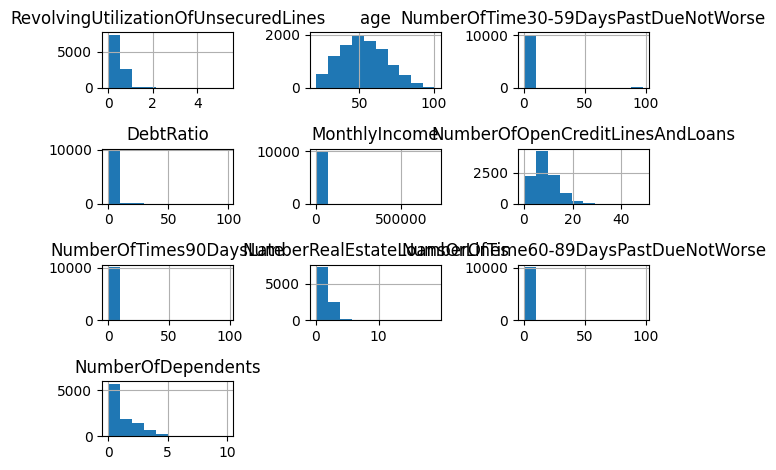

In [19]:
# Una vez que tenemos las feautures escogidas, voy a ver como están distribuidas para observar si hay que hacer alguna transformación
train_set[features_num].hist()
plt.tight_layout();

In [20]:
# Parecen que salvo la edad,  todas tienen una sola columna o una cola muy larga
for col in features_num:
    if col != 'age':
        train_set[col]= np.log(train_set[col] + 1) # aplicamos a train
        test_set[col] = np.log(test_set[col]+1)# aplicamos a test

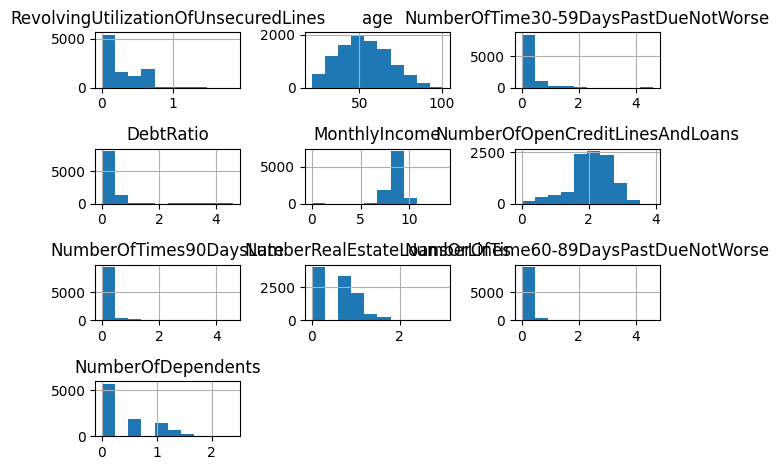

In [21]:
train_set[features_num].hist()
plt.tight_layout();

In [22]:
# Voy a esclar las features ya que el regresor logístico lo precisa, el KNN # es mas robusto con lo outliers el scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_set[features_num]= scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [23]:
X_train = train_set[features_num]
y_train = train_set['SeriousDlqin2yrs']
X_test = test_set[features_num]
y_test = test_set['SeriousDlqin2yrs']

In [24]:
# Procedemos a relaizar el último modelado KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
# Este modelo es sensible a la escala, por lo que me quedo con mis feautures ya escaladas
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      9328
           1       0.77      0.41      0.54       701

    accuracy                           0.95     10029
   macro avg       0.86      0.70      0.76     10029
weighted avg       0.94      0.95      0.94     10029



In [27]:
from sklearn.model_selection import cross_val_score
metrica = np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica

np.float64(0.5985744139866557)

In [28]:
# Regresor logístico
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

reg_log = LogisticRegression(max_iter=10000) 
metrica = np.mean(cross_val_score(reg_log,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica

np.float64(0.5639755637804881)

In [29]:
# No está muy bien nuestro modelo ya que nuestra target está muy desbalanceada. Deberiamos ajustar la target

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_clf =DecisionTreeClassifier(max_depth=2, random_state=42)
metrica = np.mean(cross_val_score(tree_clf,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica

np.float64(0.5931642756749793)